<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Загрузка данных

In [2]:
data = pd.read_csv('/Users/daniilsobolev/Desktop/ml projects/Линейная алгебра/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


In [6]:
data.duplicated().sum()

153

<AxesSubplot:>

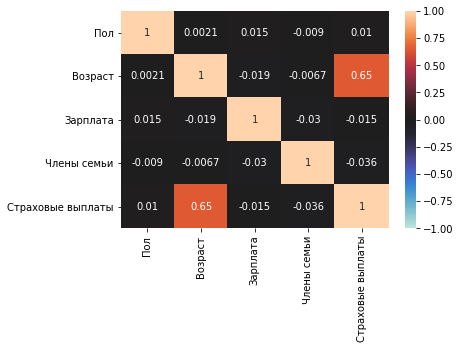

In [7]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center= 0)

В данных присутствуют дубликаты, возможно, они появились из-за неправильного соединение данных из разных источников или ошибки пользователя при занесении информации, удалим их; также переведём названия колонок в змеиный регистр; также, ради простоты переведем признаки age и salary в тип int, так как дробная часть у них отсутствует. 

Также из матрицы корреляций мы видим, что признак age и целевой признак достаточно сильно коррелируют, особенно на фоне остальных.

In [8]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
data.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

In [10]:
data['age'] = data['age'].astype('int')
data['salary'] = data['salary'].astype('int')

## Умножение матриц

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Нет, не изменится

**Обоснование:** Каждый вектор матрицы $X$ при умножении на некую обратимую матрицу $B$ переносится в другое, одинаковое для всех, векторное пространство.

Векторы исказятся, поэтому те же самые параметры w и w0 будут уже не подходящими.

Тогда формула обучения будет равна:

$$
w' = ((XB)^T XB)^{-1} (XB)^T y
$$

Или, продолжив равенство, получим:

$$
((XB)^T XB)^{-1} (XB)^T y = (B^T X^T X B)^{-1} B^T X^T y = (X^T X B)^{-1} (B^T)^{-1} B^T X^T y = B^{-1}(X^T X)^{-1} (B^T)^{-1}B^T X^T y
$$

Далее получим:

$$ 
B^{-1}(X^T X)^{-1}  X^T y = B^{-1} w, 
$$ 

что нам уже формульно доказывает, что качество не изменится, так как: 

$$ 
𝑎'=𝑋'𝑤' = XB B^{-1} w = Xw
$$



**Алгоритм шифрования**

Линейные преобразование не будут изменять качество линейной регрессии, поэтому применим к признакам несколько линейных преобразований.

Создадим рандомную матрицу 4х4 и умножим на неё

## Проверка алгоритма

In [11]:
features = data.drop('insurance_payments', axis=1)
target = data['insurance_payments']

features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    test_size=0.25, 
    random_state=12345)

In [12]:
model = LinearRegression().fit(features_train, target_train)
predictions = model.predict(features_test)
print('До преобразования', r2_score(target_test, predictions))

До преобразования 0.4230772761583642


Напишем функцию для создания обратимой матрицы со случайными элементами
(матрица обратима, если определитель не равен нулю).

In [13]:
def fill_matrix(rows, columns):
    
    while True:
        list_of_vectors = []
        
        for i in range(rows):
            list = [random.uniform(-10000, 10000) for j in range(columns)]
            list_of_vectors.append(np.array(list))
        
        if np.linalg.det(np.array(list_of_vectors)) != 0:
            break
        
    return np.array(list_of_vectors)

In [14]:
new_features = pd.DataFrame(data = features.values @ fill_matrix(4,4), 
                            columns = features.columns, 
                            index = features.index)

In [15]:
new_features

,gender,age,salary,family_members
0,2.735171e+08,3.097397e+08,-4.580270e+08,-2.621526e+07
1,2.094885e+08,2.372691e+08,-3.510054e+08,-2.010060e+07
2,1.157579e+08,1.311175e+08,-1.940029e+08,-1.110508e+07
3,2.299992e+08,2.604337e+08,-3.849812e+08,-2.204974e+07
4,1.439054e+08,1.629744e+08,-2.410628e+08,-1.378968e+07
...,...,...,...,...
4842,1.968652e+08,2.229366e+08,-3.296542e+08,-1.888537e+07
4843,2.889913e+08,3.272511e+08,-4.838224e+08,-2.769776e+07
4844,1.869649e+08,2.117106e+08,-3.129884e+08,-1.793044e+07
4845,1.803352e+08,2.041997e+08,-3.019218e+08,-1.729932e+07


In [16]:
new_features_train, new_features_test, new_target_train, new_target_test = train_test_split(
    new_features, 
    target, 
    test_size=0.25, 
    random_state=12345)

In [17]:
model = LinearRegression().fit(new_features_train, new_target_train)
predictions = model.predict(new_features_test)
print('После преобразования', r2_score(new_target_test, predictions))

После преобразования 0.4230772761583321


<AxesSubplot:>

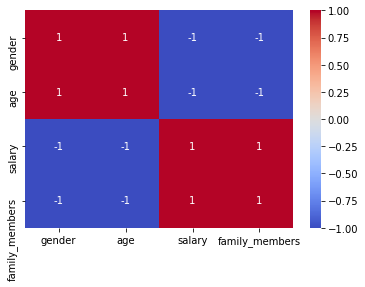

In [18]:
sns.heatmap(new_features.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

То есть после шифрования получается так, что признаки начинают сильно коррелировать друг с другом, потому что при умножении на обратимую матрицу они становятся линейно зависимыми

## Вывод

В данном проекте было необходимо защитить данные клиентов страховой компании «Хоть потоп».

Был проведен осмотр и предобработка данных.<br>
Далее теоретически выявлено, что при умножении признаков на обратимую матрицу качество линейной регрессии не изменяется.<br>
Воспользовавшись этим знанием, были зашифрованы данные, а далее проверено качество линейной регрессии до и после шифрование метрикой R2, качество оказалось одинаковым.<br>